In [68]:
import matplotlib.ticker as ticker
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import pandas as pd
from matplotlib import gridspec
from matplotlib.colors import ListedColormap 
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import os
import glob
from datetime import datetime, timedelta
import cmaps
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cftime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as patches
from cnmaps import get_adm_maps, draw_maps
import geopandas as gpd
import rioxarray
from shapely.geometry import mapping


## 批量读取数据
读取指定时间的植被数据，并将多个年份的nc数据进行合并，赋予对应的时间维度

In [69]:


def get_landuse(var):

    input_path =  r'K:/BaiduNetdiskDownload/land1900-2019/nc/'
    
    forest_path  =  os.path.join(input_path,f'{var}*.nc')
    
    forest_files = glob.glob(forest_path)
    
    forest_files.sort()
    
    
    ds_forest = []
    
    for file in forest_files:
        print(file)
        ds = xr.open_dataset(file).Band1
        ds_forest.append(ds)
    
    
    combined_ds = xr.concat(ds_forest, dim='time')
    
    years = pd.date_range(start='1900', periods=len(forest_files), freq='YS')
    
    combined_ds = combined_ds.assign_coords(time=years)
    
    return combined_ds


In [70]:

ds_forest   = get_landuse(var='forest')

K:/BaiduNetdiskDownload/land1900-2019/nc\forest-1900.nc
K:/BaiduNetdiskDownload/land1900-2019/nc\forest-1901.nc
K:/BaiduNetdiskDownload/land1900-2019/nc\forest-1902.nc
K:/BaiduNetdiskDownload/land1900-2019/nc\forest-1903.nc
K:/BaiduNetdiskDownload/land1900-2019/nc\forest-1904.nc
K:/BaiduNetdiskDownload/land1900-2019/nc\forest-1905.nc
K:/BaiduNetdiskDownload/land1900-2019/nc\forest-1906.nc
K:/BaiduNetdiskDownload/land1900-2019/nc\forest-1907.nc
K:/BaiduNetdiskDownload/land1900-2019/nc\forest-1908.nc
K:/BaiduNetdiskDownload/land1900-2019/nc\forest-1909.nc
K:/BaiduNetdiskDownload/land1900-2019/nc\forest-1910.nc
K:/BaiduNetdiskDownload/land1900-2019/nc\forest-1911.nc
K:/BaiduNetdiskDownload/land1900-2019/nc\forest-1912.nc
K:/BaiduNetdiskDownload/land1900-2019/nc\forest-1913.nc
K:/BaiduNetdiskDownload/land1900-2019/nc\forest-1914.nc
K:/BaiduNetdiskDownload/land1900-2019/nc\forest-1915.nc
K:/BaiduNetdiskDownload/land1900-2019/nc\forest-1916.nc
K:/BaiduNetdiskDownload/land1900-2019/nc\forest-

In [71]:
ds_forest 

<xarray.DataArray 'Band1' (time: 120, lat: 78, lon: 127)> Size: 5MB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 624B 16.83 17.33 17.83 18.33 ... 54.33 54.83 55.33
  * lon      (lon) float64 1kB 72.47 72.97 73.47 73.97 ... 134.5 135.0 135.5
  * time     (time) datetime64[ns] 960B 1900-01-01 1901-01-01 ... 2019-01-01
Attributes:
    long_name:     GDAL Band Number 1
    grid_mapping:  crs

d:\anaconda\ANACONDA\envs\pji\Lib\site-packages\cnmaps\maps.py:443: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf["geometry"] = map_polygons


<Axes: >

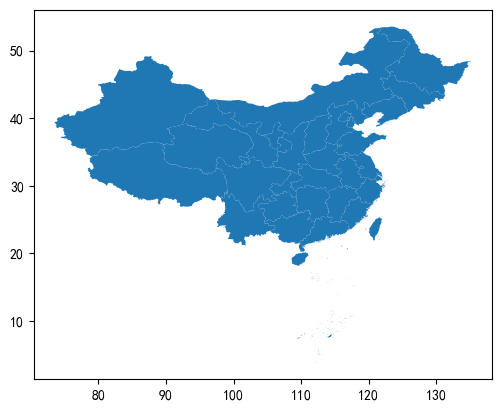

In [72]:
provinces = get_adm_maps(level='省')
    
pro_gdf = gpd.GeoDataFrame(provinces)

pro_gdf.plot()


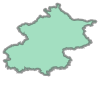

In [73]:
pro_gdf.iloc[0].geometry

In [74]:
mapping(pro_gdf.iloc[0].geometry)


{'type': 'MultiPolygon',
 'coordinates': [(((116.78350423876893, 40.031282987952146),
    (116.78413877454204, 40.033275734549896),
    (116.78340887186894, 40.03326676161256),
    (116.78267997300242, 40.03337979801206),
    (116.78237661021933, 40.03337940359812),
    (116.78017101349747, 40.03381758986242),
    (116.77973654803972, 40.033700062049),
    (116.77900774464855, 40.03380417348231),
    (116.77826996445668, 40.033804294974225),
    (116.7775312034664, 40.033804431272955),
    (116.77657727417551, 40.03362234923325),
    (116.77544719334378, 40.03360409281211),
    (116.77505685319007, 40.0334256766159),
    (116.77387587496983, 40.03277045185393),
    (116.77315532658027, 40.0322017344408),
    (116.7724257916683, 40.03163302434438),
    (116.77184436744383, 40.03128546519774),
    (116.77171427180244, 40.03122834053165),
    (116.77145955366521, 40.02741328173096),
    (116.77138267374812, 40.02598827698904),
    (116.77092435416702, 40.02574284893151),
    (116.76932627

d:\anaconda\ANACONDA\envs\pji\Lib\site-packages\cnmaps\maps.py:443: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf["geometry"] = map_polygons
C:\Users\jixianpu\AppData\Local\Temp\ipykernel_26944\2355730166.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(5, 5))


Error processing 香港特别行政区: No data found in bounds. Data variable: Band1
Error processing 澳门特别行政区: No data found in bounds. Data variable: Band1
[{'province': '北京市', 'data': array([0.13351095, 0.22884785, 0.33132085], dtype=float32)}, {'province': '天津市', 'data': array([0.03738655, 0.06171062, 0.07154651], dtype=float32)}, {'province': '河北省', 'data': array([0.10578538, 0.17566611, 0.21552058], dtype=float32)}, {'province': '山西省', 'data': array([0.06893908, 0.11610957, 0.14214972], dtype=float32)}, {'province': '内蒙古自治区', 'data': array([0.13375   , 0.15039873, 0.19839549], dtype=float32)}, {'province': '辽宁省', 'data': array([0.23210168, 0.2905599 , 0.31836176], dtype=float32)}, {'province': '吉林省', 'data': array([0.32193464, 0.33509275, 0.3336707 ], dtype=float32)}, {'province': '黑龙江省', 'data': array([0.36464882, 0.37213078, 0.38455698], dtype=float32)}, {'province': '上海市', 'data': array([0.01366492, 0.02459865, 0.06496277], dtype=float32)}, {'province': '江苏省', 'data': array([0.04445359, 0.0

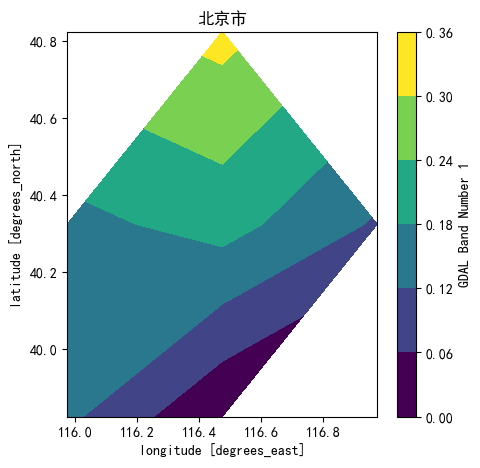

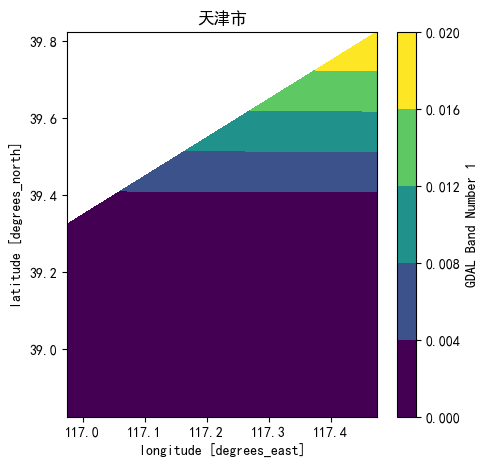

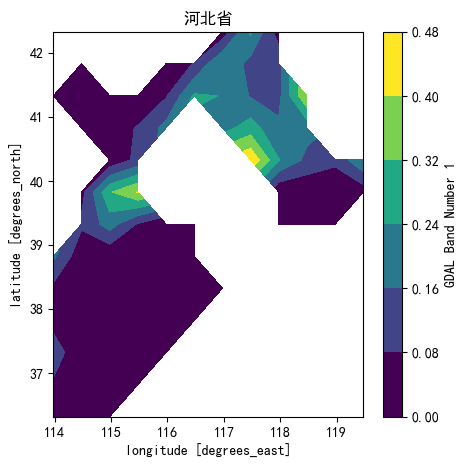

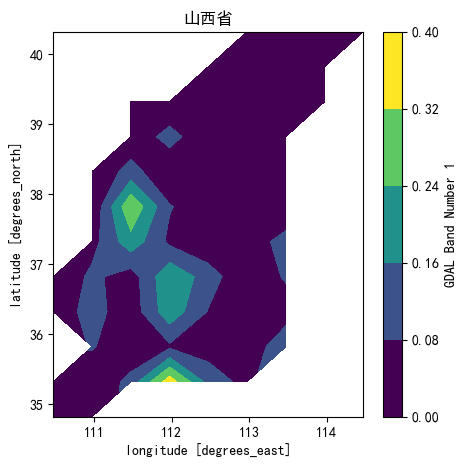

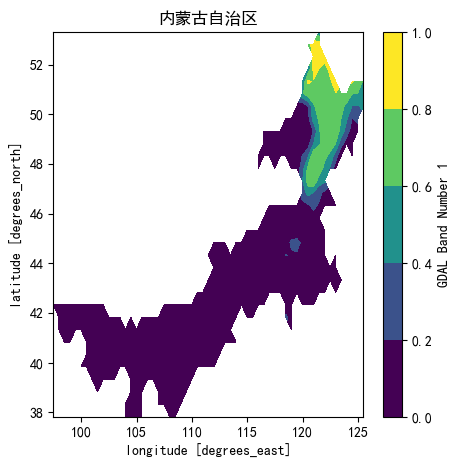

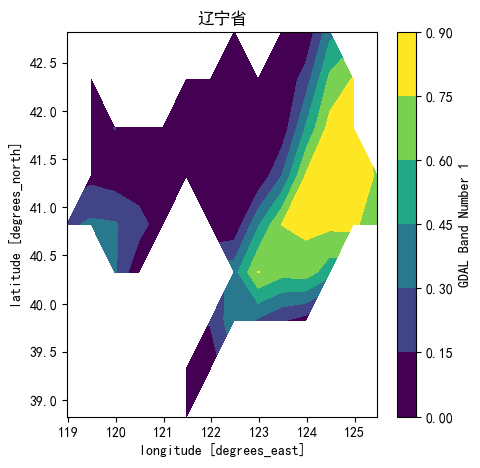

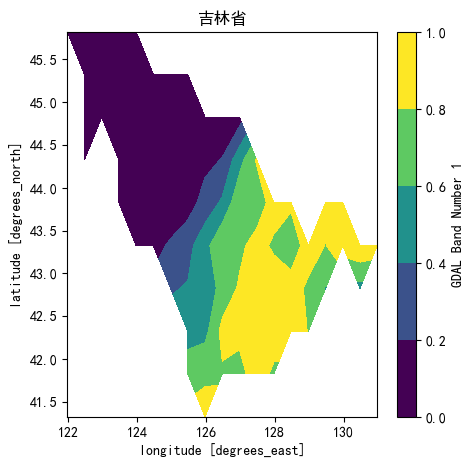

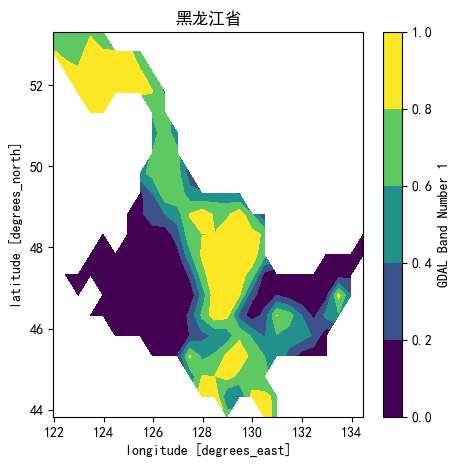

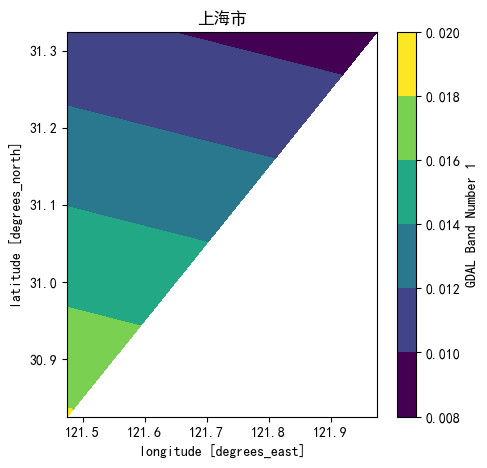

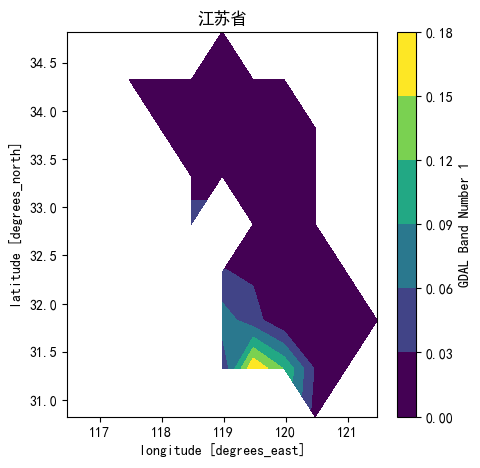

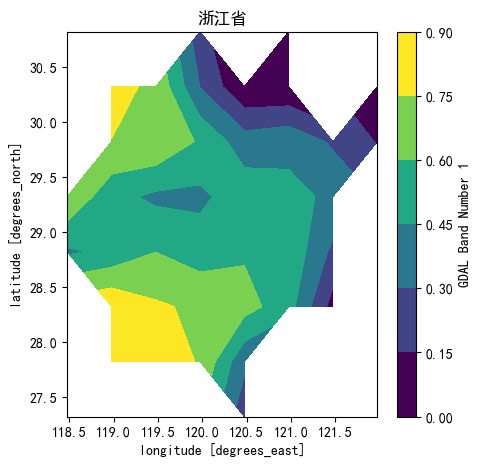

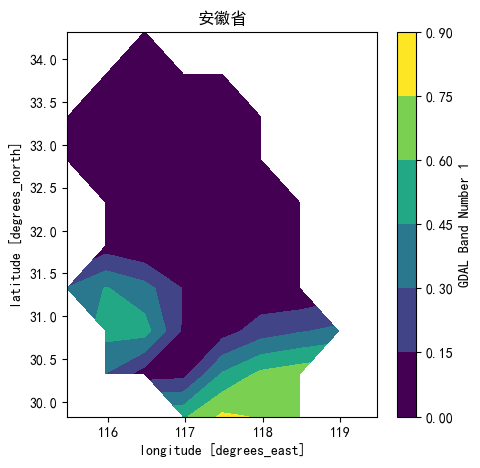

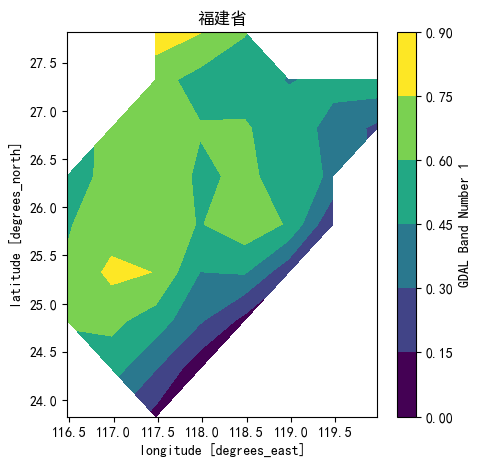

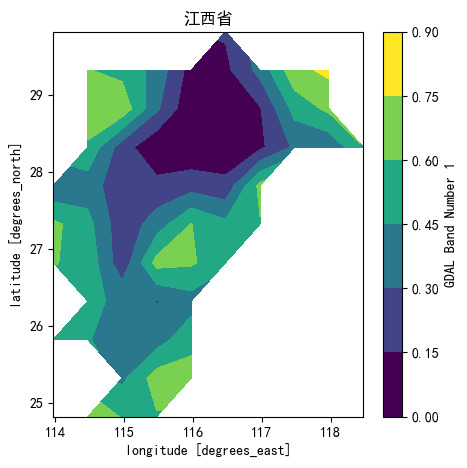

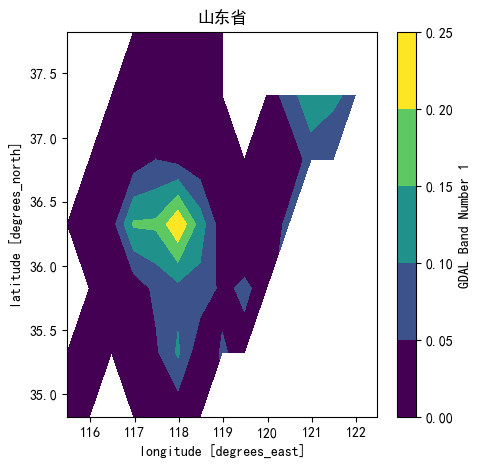

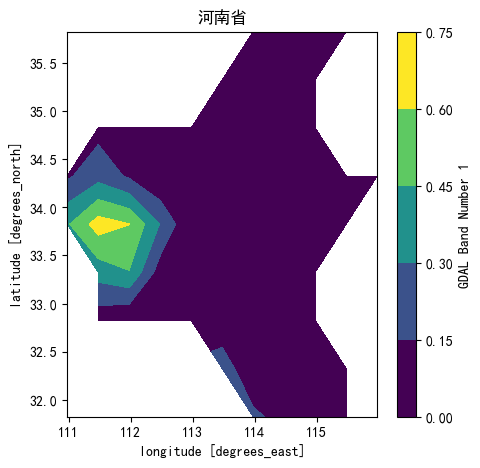

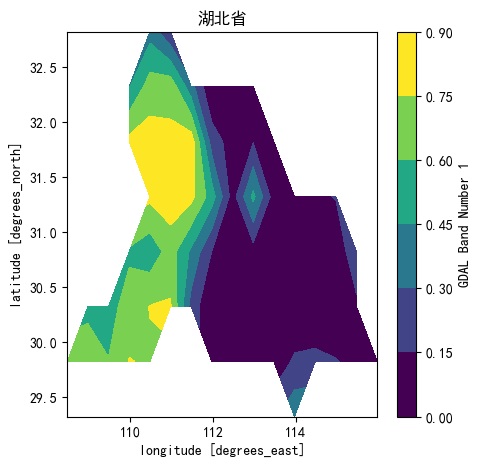

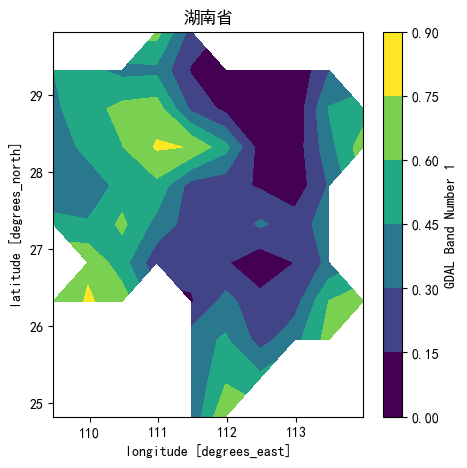

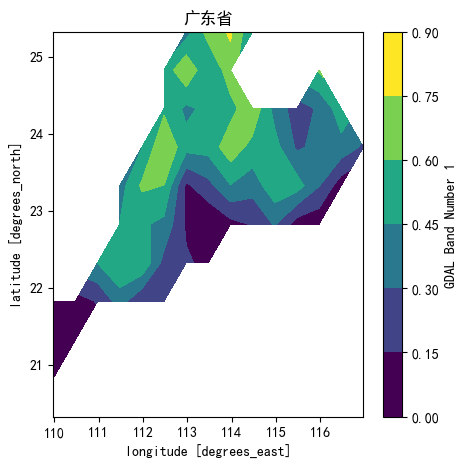

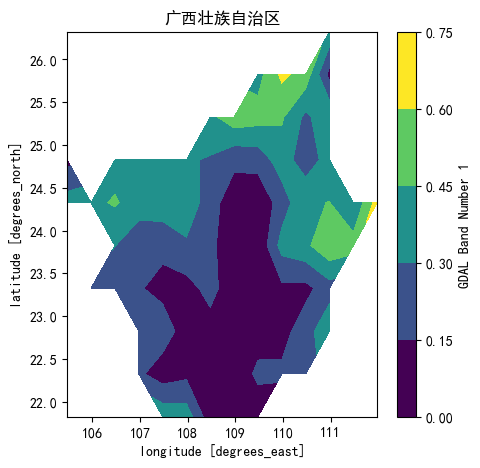

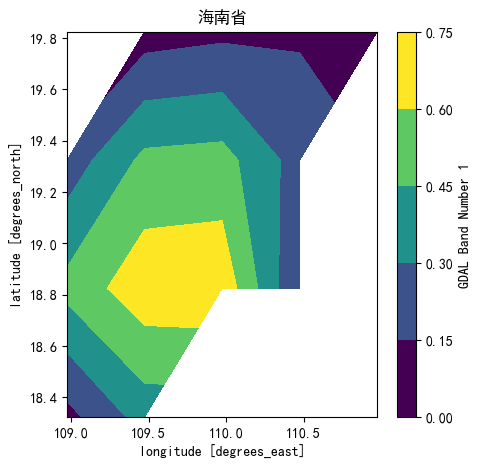

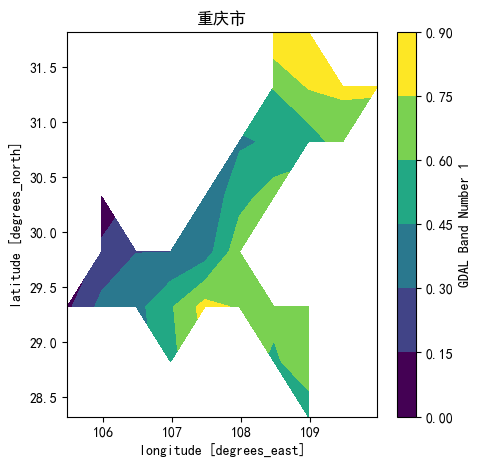

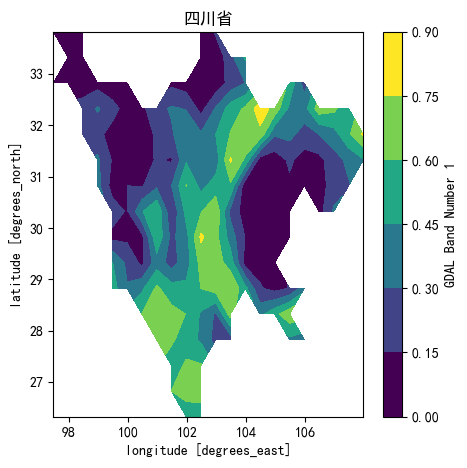

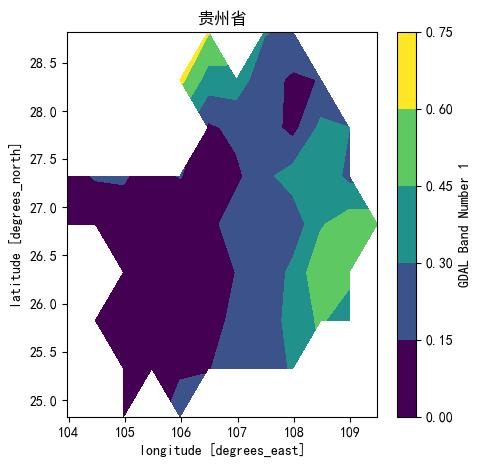

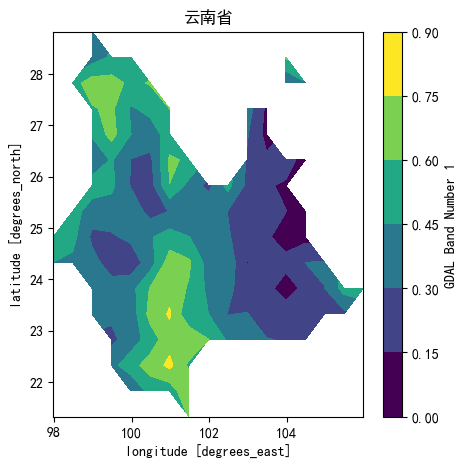

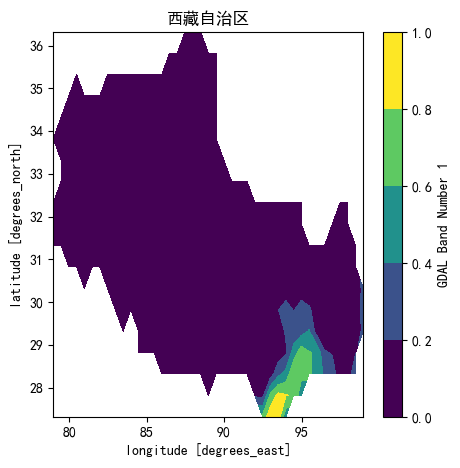

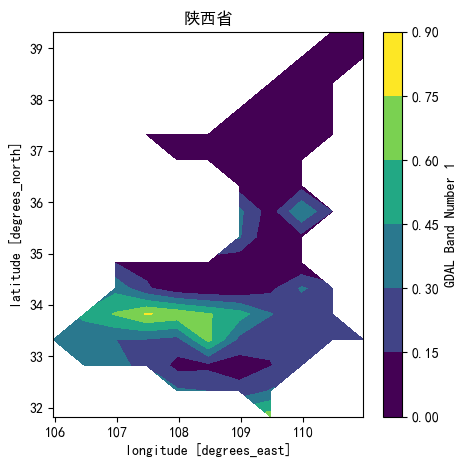

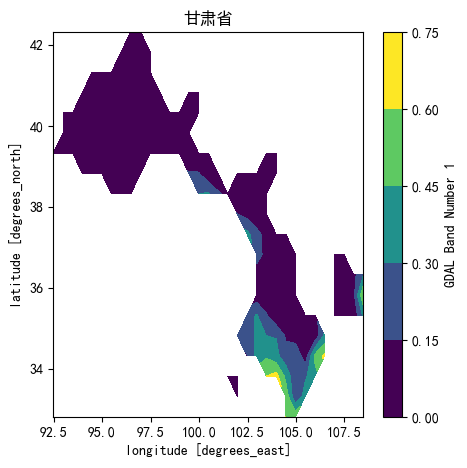

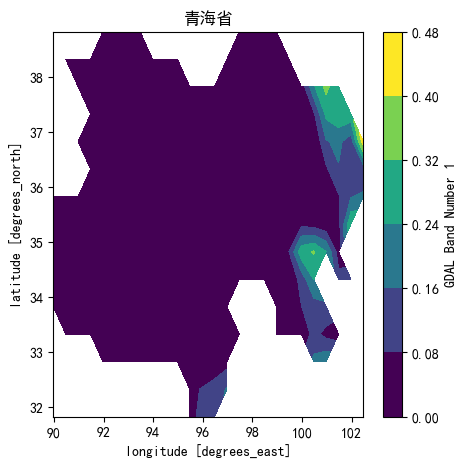

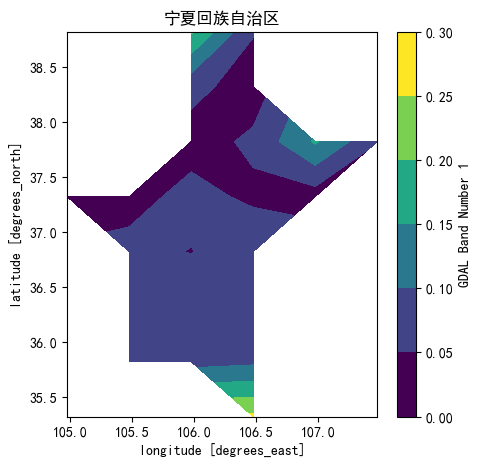

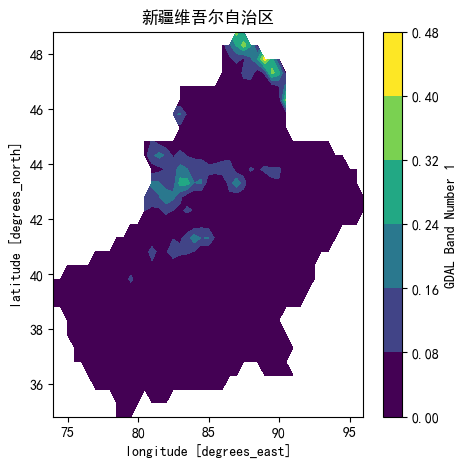

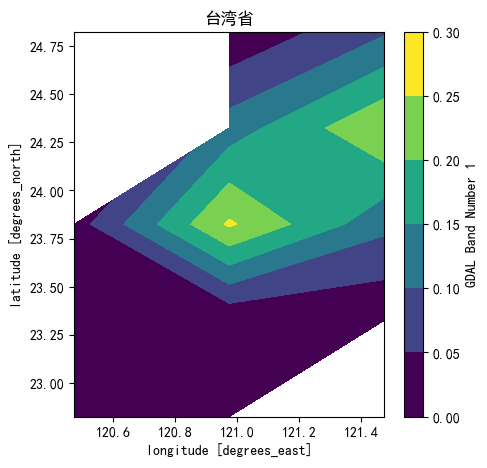

In [75]:


def cal_pro_landuse(ds_land):
    
    ds = ds_land
    
    ### 省份提取
    
    provinces = get_adm_maps(level='省')
    
    pro_gdf = gpd.GeoDataFrame(provinces)
    
    ds = ds.rio.write_crs("EPSG:4326")
    
    # 创建一个 DataFrame 来存储各省份数据的概率分布
    province_distribution = []
    
    # 遍历每个省份
    for province in pro_gdf.itertuples():
        # 获取省份的边界
        province_boundary = province.geometry
        
        try:
            # print(province)
            # 将降水数据裁剪到省份边界
            ds_clipped = ds.rio.clip([mapping(province_boundary)], ds.rio.crs)
            
            ds_1990 = ds_clipped.sel(time='1990').mean().data
            ds_2000 = ds_clipped.sel(time='2000').mean()
            ds_2010 = ds_clipped.sel(time='2010').mean()
            ds_set  = np.array([ds_1990,ds_2000,ds_2010 ])

            fig = plt.figure(figsize=(5, 5))
            ds_clipped[0].plot.contourf()
            plt.title(province._2)
    
            province_distribution.append({
                'province': getattr(province, '_2'),  # 使用 getattr 提取省份名称
                'data': ds_set
            })
        except Exception as e:
            print(f'Error processing {province._2}: {e}')
    

    return province_distribution


forest = cal_pro_landuse(ds_forest)

print(forest)

绘图展示各省份的森林变化情况

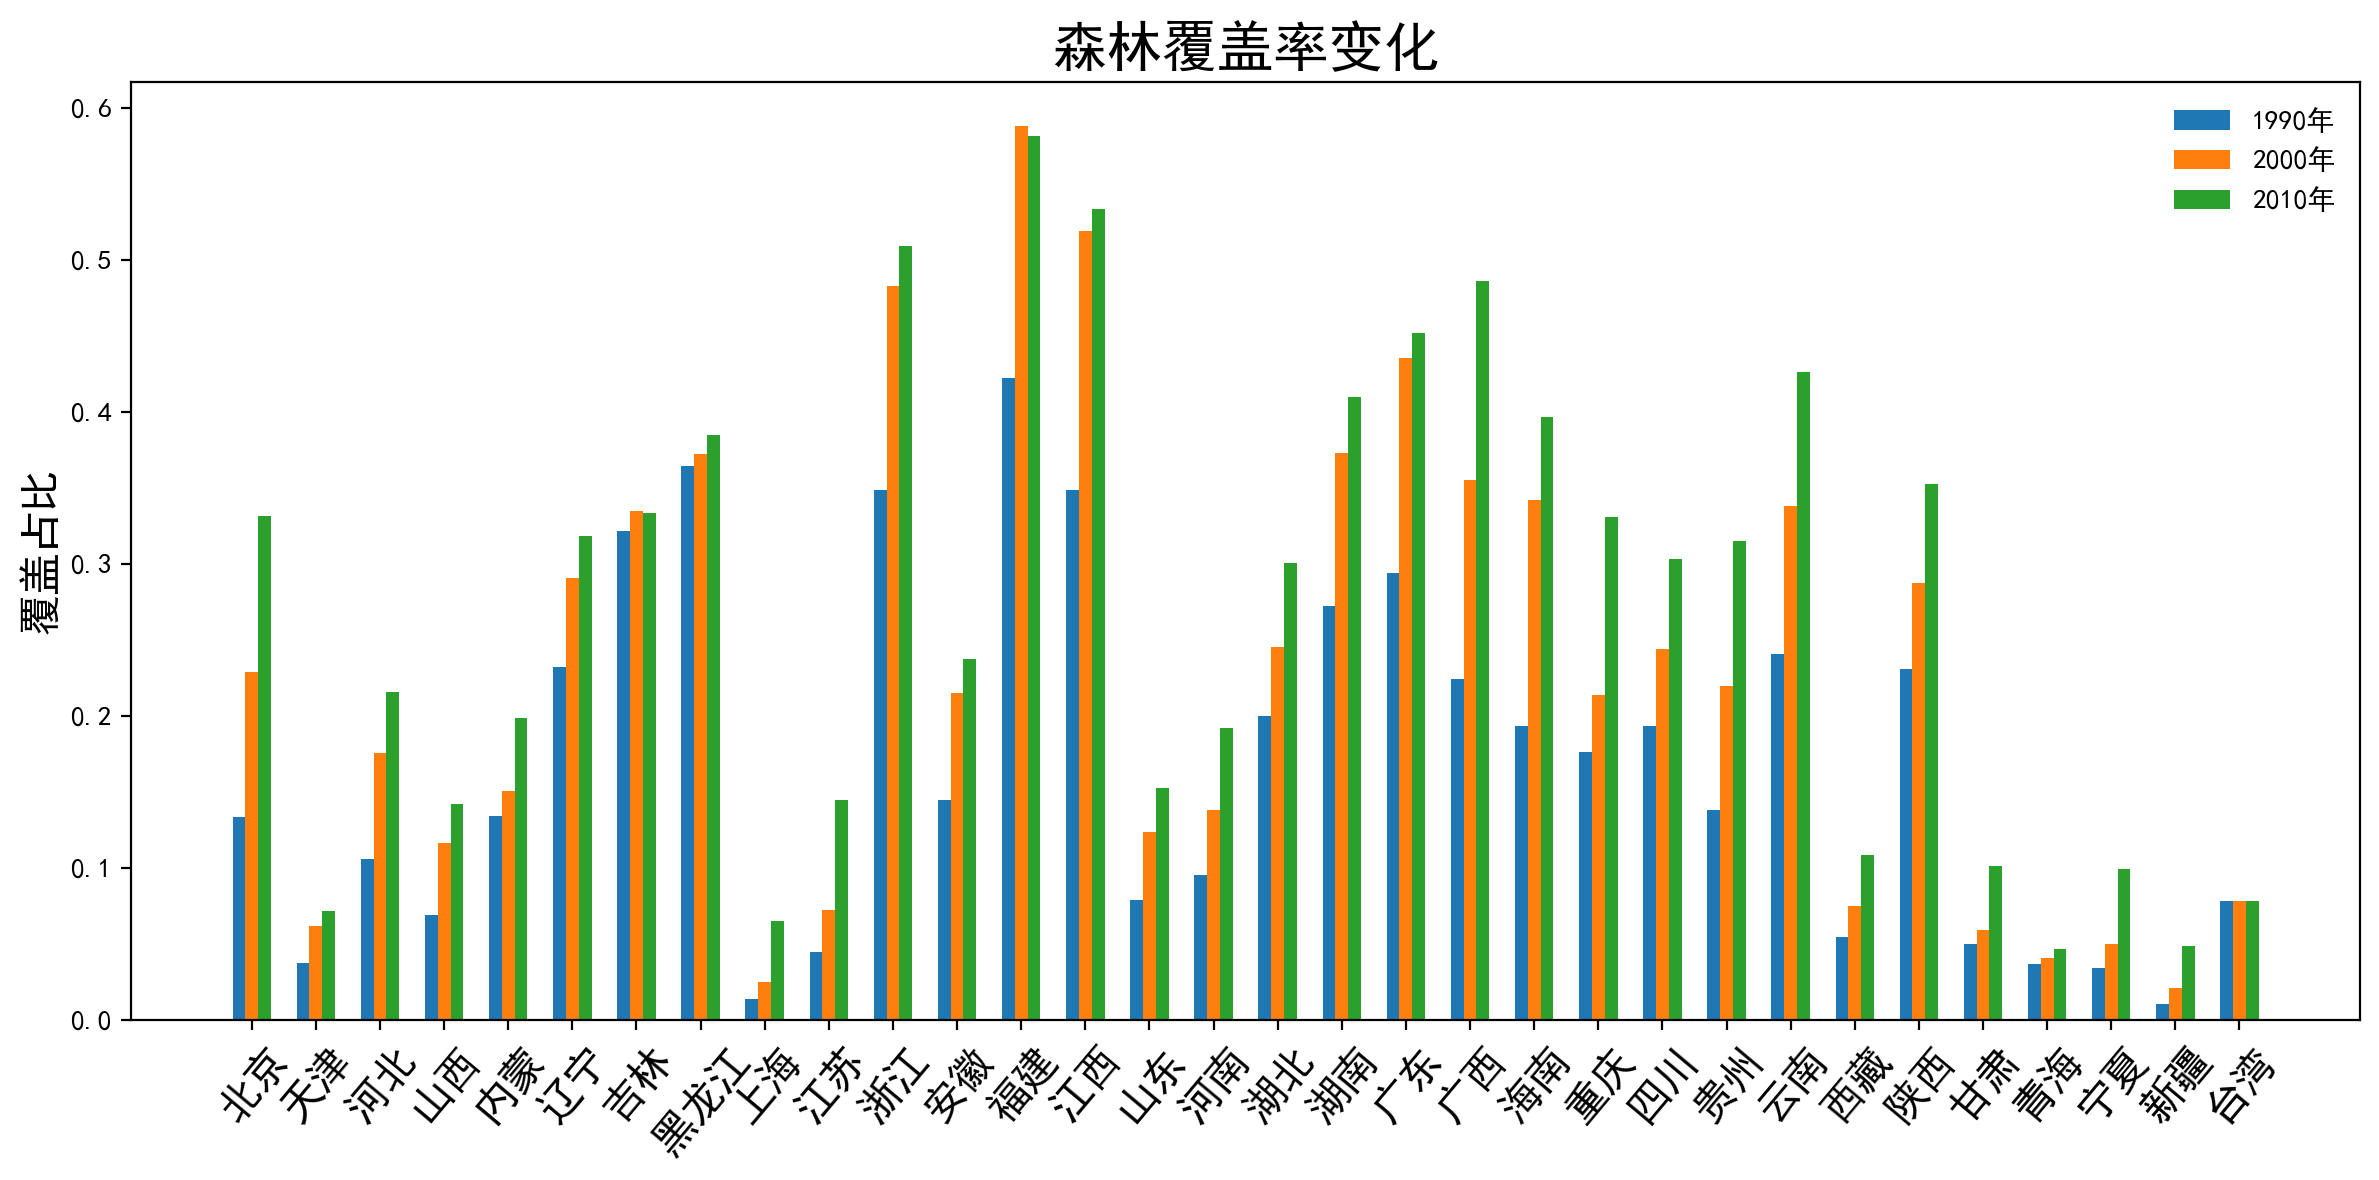

In [76]:


# 提取省份和数值
provinces = [
    '北京', '天津', '河北', '山西', '内蒙', '辽宁', '吉林', '黑龙江', '上海',
    '江苏', '浙江', '安徽', '福建', '江西', '山东', '河南', '湖北', '湖南',
    '广东', '广西', '海南', '重庆', '四川', '贵州', '云南', '西藏', '陕西',
    '甘肃', '青海', '宁夏', '新疆', '台湾'
]


def plot(forest,name='森林'):
    
    save = name
    
    values = np.array([item['data'] for item in forest])
    # 设置条形图的参数
    x = np.arange(len(provinces))
    width = 0.2  # 每个条形的宽度
    
    # 绘制条形图
    
    titles = ['1990年','2000年','2010年']
    plt.rcParams['font.sans-serif'] = ['SimHei']
    
    fig, ax = plt.subplots(dpi=200,figsize=(12,6))
    for i in range(values.shape[1]):
        ax.bar(x + i * width, values[:, i], width, label=f'{titles[i]}',
               
               )
    
    
    ax.set_ylabel('覆盖占比',size=15,)
    ax.set_title(f'{name}覆盖率变化',size=20)
    ax.set_xticks(x + width)
    ax.set_xticklabels(provinces,size=15 )
    ax.legend(frameon=False)
    
    plt.xticks(rotation=50)
    plt.tight_layout()
    plt.show()
    outputpath = 'I:/2024-math-modeling/Q1/trend/' + name +'.png'
    # fig.savefig(outputpath,format='png',
    #             dpi=300, bbox_inches='tight')


plot(forest,'森林')


